In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
train=pd.read_csv('train.csv')

In [3]:
train.info() # metrics 'r2_score'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

In [4]:
train.isna().sum()

Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

In [5]:
train.head(10)

Customer ID               Name Gender  Age  Income (USD) Income Stability  \
0     C-36995   Frederica Shealy      F   56       1933.05              Low   
1     C-33999  America Calderone      M   32       4952.91              Low   
2      C-3770      Rosetta Verne      F   65        988.19             High   
3     C-26480         Zoe Chitty      F   65           NaN             High   
4     C-23459       Afton Venema      F   31       2614.77              Low   
5     C-17688     Polly Crumpler      F   60       1234.92              Low   
6     C-23855   Nathalie Olivier      M   43       2361.56              Low   
7     C-11006   Clarinda Montana      F   45           NaN              Low   
8     C-26934       Kenny Ankrom      F   38       1296.07              Low   
9     C-24944     Barbie Goetsch      M   18       1546.17              Low   

      Profession     Type of Employment    Location  \
0        Working            Sales staff  Semi-Urban   
1        Working                    NaN  Semi-Urban   
2      Pensioner                    NaN  Semi-Urban   
3      Pensioner                    NaN       Rural   
4        Working  High skill tech staff  Semi-Urban   
5  State servant            Secretaries       Rural   
6        Working               Laborers  Semi-Urban   
7  State servant               Managers  Semi-Urban   
8        Working          Cooking staff       Rural   
9        Working               Laborers       Rural   

   Loan Amount Request (USD)  ...  Credit Score No. of Defaults  \
0                   72809.58  ...        809.44               0   
1                   46837.47  ...        780.40               0   
2                   45593.04  ...        833.15               0   
3                   80057.92  ...        832.70               1   
4                  113858.89  ...        745.55               1   
5                   34434.72  ...        684.12               1   
6                  152561.34  ...        637.29               0   
7                  240311.77  ...        812.26               0   
8                   35141.99  ...        705.29               1   
9                   42091.29  ...        613.24               0   

  Has Active Credit Card  Property ID  Property Age  Property Type  \
0                    NaN          746       1933.05              4   
1            Unpossessed          608       4952.91              2   
2            Unpossessed          546        988.19              2   
3            Unpossessed          890           NaN              2   
4                 Active          715       2614.77              4   
5               Inactive          491       1234.92              2   
6            Unpossessed          227       2361.56              1   
7                 Active          314           NaN              2   
8                 Active          241       1296.07              4   
9            Unpossessed          883       1546.17              2   

  Property Location  Co-Applicant  Property Price  Loan Sanction Amount (USD)  
0             Rural             1       119933.46                    54607.18  
1             Rural             1        54791.00                    37469.98  
2             Urban             0        72440.58                    36474.43  
3        Semi-Urban             1       121441.51                    56040.54  
4        Semi-Urban             1       208567.91                    74008.28  
5             Rural             1        43146.82                    22382.57  
6        Semi-Urban             1       221050.80                        0.00  
7             Urban             1       401040.70                   168218.24  
8             Rural             1        54903.44                    22842.29  
9             Urban             1        67993.43                        0.00  

[10 rows x 24 columns]

In [6]:
#income usd and property age are same---- drop either

In [7]:
pd.value_counts(train['Income Stability'],dropna=False)

Low     25751
High     2566
NaN      1683
Name: Income Stability, dtype: int64

In [8]:
train['Income Stability']=train['Income Stability'].fillna(train['Income Stability'].mode()[0]) #filled with mode--

In [9]:
# type of employment drop--

C:\Users\hnush\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Current Loan Expenses (USD)', ylabel='Density'>

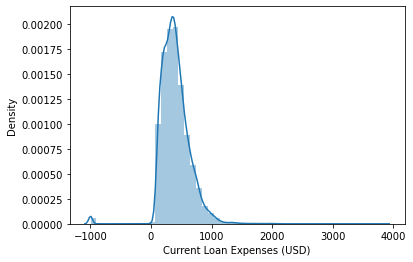

In [10]:
sns.distplot(train['Current Loan Expenses (USD)'])

C:\Users\hnush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Current Loan Expenses (USD)'>

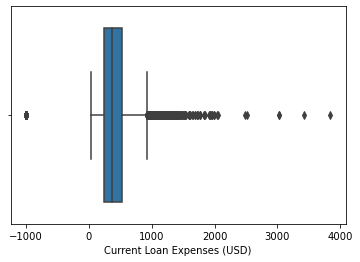

In [11]:
sns.boxplot(train['Current Loan Expenses (USD)'])

In [12]:
train['Current Loan Expenses (USD)'][train['Current Loan Expenses (USD)']<0]=np.nan
train['Current Loan Expenses (USD)']=train['Current Loan Expenses (USD)'].fillna(train['Current Loan Expenses (USD)'].median())

<ipython-input-12-680ec3a5df54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Current Loan Expenses (USD)'][train['Current Loan Expenses (USD)']<0]=np.nan


In [13]:
pd.value_counts(train['Dependents'],dropna=False)

2.0     13108
3.0      5719
1.0      5544
4.0      2704
NaN      2493
5.0       372
6.0        50
7.0         7
14.0        1
10.0        1
8.0         1
Name: Dependents, dtype: int64

In [14]:
train['Dependents']=train['Dependents'].fillna(train['Dependents'].mode()[0])

C:\Users\hnush\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit Score', ylabel='Density'>

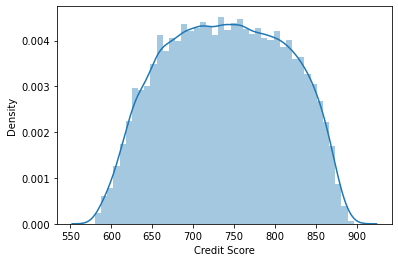

In [15]:
sns.distplot(train['Credit Score'])

In [16]:
train['Credit Score']=train['Credit Score'].fillna(train['Credit Score'].mean())

In [17]:
pd.value_counts(train['Has Active Credit Card'],dropna=False)

Active         9771
Inactive       9466
Unpossessed    9197
NaN            1566
Name: Has Active Credit Card, dtype: int64

In [18]:
train['Has Active Credit Card']=train['Has Active Credit Card'].fillna(method='ffill')

In [19]:
pd.value_counts(train['Has Active Credit Card'],dropna=False)

Active         10305
Inactive       10002
Unpossessed     9692
NaN                1
Name: Has Active Credit Card, dtype: int64

In [20]:
train['Has Active Credit Card']=train['Has Active Credit Card'].fillna(method='bfill')

In [21]:
pd.value_counts(train['Property Location'],dropna=False)

Semi-Urban    10387
Rural         10041
Urban          9216
NaN             356
Name: Property Location, dtype: int64

In [22]:
train['Property Location']=train['Property Location'].fillna(train['Property Location'].mode()[0])

In [23]:
pd.value_counts(train['Loan Sanction Amount (USD)'])

 0.00         7865
-999.00        338
 28937.45        3
 105047.72       2
 15270.22        2
              ... 
 66343.58        1
 61901.05        1
 288477.14       1
 35293.26        1
 34041.85        1
Name: Loan Sanction Amount (USD), Length: 21450, dtype: int64

In [24]:
train['Loan Sanction Amount (USD)'][train['Loan Sanction Amount (USD)']<0]=np.nan
train['Loan Sanction Amount (USD)']=train['Loan Sanction Amount (USD)'].fillna(method='ffill')

<ipython-input-24-32c6d7c00d14>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Loan Sanction Amount (USD)'][train['Loan Sanction Amount (USD)']<0]=np.nan


In [25]:
pd.value_counts(train['Co-Applicant'])

 1      25516
 0       4316
-999      168
Name: Co-Applicant, dtype: int64

In [26]:
train['Co-Applicant'][train['Co-Applicant']<0]=np.nan
train['Co-Applicant']=train['Co-Applicant'].fillna(train['Co-Applicant'].mode()[0])

<ipython-input-26-42f855498379>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Co-Applicant'][train['Co-Applicant']<0]=np.nan


In [27]:
pd.value_counts(train['Property Price'])

-999.00       352
 85907.50       2
 51395.67       2
 356356.48      2
 335541.91      2
             ... 
 264143.95      1
 35831.68       1
 282237.12      1
 108754.71      1
 260239.33      1
Name: Property Price, Length: 29632, dtype: int64

In [28]:
train['Property Price'][train['Property Price']<0]=np.nan

<ipython-input-28-222084c746dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Property Price'][train['Property Price']<0]=np.nan


C:\Users\hnush\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Property Price', ylabel='Density'>

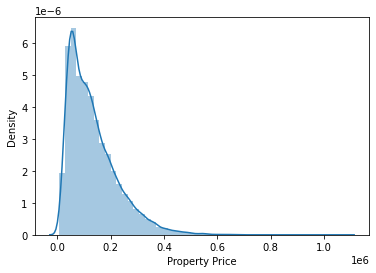

In [29]:
sns.distplot(train['Property Price'])

In [30]:
train['Property Price']=train['Property Price'].fillna(train['Property Price'].median())

In [31]:
train['Income (USD)']=train['Income (USD)'].fillna(train['Income (USD)'].median())

In [32]:
train.columns

Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')

In [33]:
train.drop(['Customer ID', 'Name', 'Gender','Property Age', 'Property ID','Type of Employment','Profession'],axis=1,inplace=True)

In [34]:
train.head()

Age  Income (USD) Income Stability    Location  Loan Amount Request (USD)  \
0   56      1933.050              Low  Semi-Urban                   72809.58   
1   32      4952.910              Low  Semi-Urban                   46837.47   
2   65       988.190             High  Semi-Urban                   45593.04   
3   65      2222.435             High       Rural                   80057.92   
4   31      2614.770              Low  Semi-Urban                  113858.89   

   Current Loan Expenses (USD) Expense Type 1 Expense Type 2  Dependents  \
0                       241.08              N              N         3.0   
1                       495.81              N              Y         1.0   
2                       171.95              N              Y         1.0   
3                       298.54              N              Y         2.0   
4                       491.41              N              Y         2.0   

   Credit Score  No. of Defaults Has Active Credit Card  Property Type  \
0        809.44                0            Unpossessed              4   
1        780.40                0            Unpossessed              2   
2        833.15                0            Unpossessed              2   
3        832.70                1            Unpossessed              2   
4        745.55                1                 Active              4   

  Property Location  Co-Applicant  Property Price  Loan Sanction Amount (USD)  
0             Rural           1.0       119933.46                    54607.18  
1             Rural           1.0        54791.00                    37469.98  
2             Urban           0.0        72440.58                    36474.43  
3        Semi-Urban           1.0       121441.51                    56040.54  
4        Semi-Urban           1.0       208567.91                    74008.28

In [35]:
train.shape

(30000, 17)

In [36]:
train.isna().sum()

Age                            0
Income (USD)                   0
Income Stability               0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

In [37]:
test=pd.read_csv('test.csv')

In [38]:
test=test[train.columns[:-1]]

In [39]:
test

Age  Income (USD) Income Stability    Location  \
0       47       3472.69              Low  Semi-Urban   
1       57       1184.84              Low       Rural   
2       52       1266.27              Low  Semi-Urban   
3       65       1369.72             High       Rural   
4       60       1939.23             High       Urban   
...    ...           ...              ...         ...   
19995   19       1349.60              Low  Semi-Urban   
19996   22       2019.78              Low       Urban   
19997   19       2252.03              Low  Semi-Urban   
19998   21       1845.35              Low  Semi-Urban   
19999   21       5233.16              Low  Semi-Urban   

       Loan Amount Request (USD)  Current Loan Expenses (USD) Expense Type 1  \
0                      137088.98                       396.72              N   
1                      104771.59                       463.76              Y   
2                      176684.91                       493.15              N   
3                       97009.18                       446.15              N   
4                      109980.00                       370.10              N   
...                          ...                          ...            ...   
19995                  156766.97                       500.59              Y   
19996                   47924.80                       243.02              Y   
19997                   18629.88                       101.88              Y   
19998                   95430.73                       271.31              N   
19999                  107966.03                       983.45              Y   

      Expense Type 2  Dependents  Credit Score  No. of Defaults  \
0                  N         2.0        799.14                0   
1                  Y         2.0        833.31                0   
2                  Y         3.0        627.44                0   
3                  Y         2.0        833.20                0   
4                  N         NaN           NaN                0   
...              ...         ...           ...              ...   
19995              Y         4.0        684.32                0   
19996              Y         NaN        706.34                0   
19997              N         1.0        656.46                0   
19998              Y         2.0        865.46                0   
19999              Y         3.0        857.16                1   

      Has Active Credit Card  Property Type Property Location Co-Applicant  \
0                Unpossessed              2             Urban            1   
1                Unpossessed              1             Rural            1   
2                Unpossessed              1             Urban            1   
3                   Inactive              1        Semi-Urban            0   
4                        NaN              4        Semi-Urban            1   
...                      ...            ...               ...          ...   
19995               Inactive              4        Semi-Urban            1   
19996               Inactive              4             Urban            1   
19997               Inactive              2             Rural            0   
19998            Unpossessed              1        Semi-Urban            1   
19999                 Active              4        Semi-Urban            0   

      Property Price  
0           236644.5  
1           142357.3  
2          300991.24  
3           125612.1  
4           180908.0  
...              ...  
19995       212778.0  
19996       90816.95  
19997       21566.27  
19998      120281.17  
19999      133425.43  

[20000 rows x 16 columns]

In [40]:
test.isna().sum()

Age                               0
Income (USD)                    750
Income Stability                813
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)      83
Expense Type 1                    0
Expense Type 2                    0
Dependents                     1142
Credit Score                    743
No. of Defaults                   0
Has Active Credit Card         1076
Property Type                     0
Property Location               160
Co-Applicant                      0
Property Price                    0
dtype: int64

In [41]:
pd.value_counts(test['Income (USD)'],dropna=False)

NaN        750
2248.35      3
1923.12      3
1876.05      3
1720.04      3
          ... 
3824.15      1
2943.85      1
3522.55      1
2300.71      1
3185.51      1
Name: Income (USD), Length: 18694, dtype: int64

C:\Users\hnush\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income (USD)', ylabel='Density'>

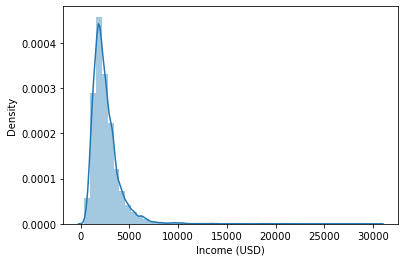

In [42]:
sns.distplot(test['Income (USD)'])

In [43]:
test['Income (USD)']=test['Income (USD)'].fillna(test['Income (USD)'].median())

In [44]:
pd.value_counts(test['Income Stability'],dropna=False)

Low     17501
High     1686
NaN       813
Name: Income Stability, dtype: int64

In [45]:
test['Income Stability']=test['Income Stability'].fillna(test['Income Stability'].mode()[0])

In [46]:
test['Current Loan Expenses (USD)']=test['Current Loan Expenses (USD)'].fillna(test['Current Loan Expenses (USD)'].median())

In [47]:
pd.value_counts(test['Dependents'],dropna=False)

2.0     8951
3.0     3874
1.0     3843
4.0     1915
NaN     1142
5.0      245
6.0       21
8.0        4
7.0        3
10.0       1
13.0       1
Name: Dependents, dtype: int64

In [48]:
test['Dependents']=test['Dependents'].fillna(method='ffill')

In [49]:
pd.value_counts(test['Dependents'],dropna=False)

2.0     9506
3.0     4094
1.0     4067
4.0     2044
5.0      257
6.0       23
8.0        4
7.0        3
10.0       1
13.0       1
Name: Dependents, dtype: int64

In [50]:
test['Credit Score']=test['Credit Score'].fillna(test['Credit Score'].median())

In [51]:
pd.value_counts(test['Has Active Credit Card'],dropna=False)

Active         6418
Inactive       6376
Unpossessed    6130
NaN            1076
Name: Has Active Credit Card, dtype: int64

In [52]:
test['Has Active Credit Card']=test['Has Active Credit Card'].fillna(method='ffill')

In [53]:
pd.value_counts(test['Has Active Credit Card'],dropna=False)

Active         6781
Inactive       6757
Unpossessed    6462
Name: Has Active Credit Card, dtype: int64

In [54]:
pd.value_counts(test['Property Location'],dropna=False)

Semi-Urban    6839
Rural         6768
Urban         6233
NaN            160
Name: Property Location, dtype: int64

In [55]:
test['Property Location']=test['Property Location'].fillna(test['Property Location'].mode()[0])

In [56]:
pd.value_counts(test['Co-Applicant'])

1    17004
0     2919
?       77
Name: Co-Applicant, dtype: int64

In [57]:
test['Co-Applicant']=test['Co-Applicant'].replace(['?'],[np.nan])

In [58]:
pd.value_counts(test['Co-Applicant'],dropna=False)

1      17004
0       2919
NaN       77
Name: Co-Applicant, dtype: int64

In [59]:
test['Co-Applicant']=test['Co-Applicant'].fillna(test['Co-Applicant'].mode()[0])

In [60]:
pd.value_counts(test['Property Price'],dropna=False)

?            168
110103.62      2
101012.42      2
77441.22       2
88372.15       2
            ... 
197503.69      1
45043.11       1
49453.88       1
26852.0        1
138842.46      1
Name: Property Price, Length: 19824, dtype: int64

In [61]:
test['Property Price']=test['Property Price'].replace(['?'],[np.nan])

In [62]:
test['Property Price']=test['Property Price'].astype(float)

C:\Users\hnush\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Property Price', ylabel='Density'>

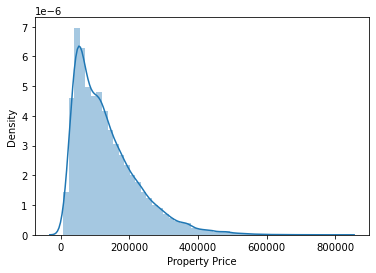

In [63]:
sns.distplot(test['Property Price'])

In [64]:
test['Property Price']=test['Property Price'].fillna(test['Property Price'].median())

In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          30000 non-null  int64  
 1   Income (USD)                 30000 non-null  float64
 2   Income Stability             30000 non-null  object 
 3   Location                     30000 non-null  object 
 4   Loan Amount Request (USD)    30000 non-null  float64
 5   Current Loan Expenses (USD)  30000 non-null  float64
 6   Expense Type 1               30000 non-null  object 
 7   Expense Type 2               30000 non-null  object 
 8   Dependents                   30000 non-null  float64
 9   Credit Score                 30000 non-null  float64
 10  No. of Defaults              30000 non-null  int64  
 11  Has Active Credit Card       30000 non-null  object 
 12  Property Type                30000 non-null  int64  
 13  Property Locatio

In [66]:
for i in train.columns:
    print(i,'-->',pd.unique(train[i]))

Age --> [56 32 65 31 60 43 45 38 18 39 48 61 54 64 41 19 44 24 55 63 23 29 28 49
 30 37 51 27 59 62 21 33 58 25 26 50 46 22 36 53 34 40 35 42 57 47 52 20]
Income (USD) --> [1933.05 4952.91  988.19 ... 1606.88 2417.71 3068.24]
Income Stability --> ['Low' 'High']
Location --> ['Semi-Urban' 'Rural' 'Urban']
Loan Amount Request (USD) --> [ 72809.58  46837.47  45593.04 ...  81410.08 142524.1  156290.54]
Current Loan Expenses (USD) --> [241.08 495.81 171.95 ... 583.11 378.29 693.94]
Expense Type 1 --> ['N' 'Y']
Expense Type 2 --> ['N' 'Y']
Dependents --> [ 3.  1.  2.  4.  5.  8.  6.  7. 10. 14.]
Credit Score --> [809.44 780.4  833.15 ... 709.43 869.61 815.44]
No. of Defaults --> [0 1]
Has Active Credit Card --> ['Unpossessed' 'Active' 'Inactive']
Property Type --> [4 2 1 3]
Property Location --> ['Rural' 'Urban' 'Semi-Urban']
Co-Applicant --> [1. 0.]
Property Price --> [119933.46  54791.    72440.58 ... 102108.02 168194.47 194512.6 ]
Loan Sanction Amount (USD) --> [ 54607.18  37469.98  36474

In [67]:
df=pd.DataFrame()
for i in train.columns:
    if np.dtype(train[i])=='O':
        x=pd.get_dummies(train[i],prefix=i+'_',drop_first=True)
        df=pd.concat([df,x],axis=1)
    else:
        df=pd.concat([df,train[i]],axis=1)

In [68]:
df

Age  Income (USD)  Income Stability__Low  Location__Semi-Urban  \
0       56      1933.050                      1                     1   
1       32      4952.910                      1                     1   
2       65       988.190                      0                     1   
3       65      2222.435                      0                     0   
4       31      2614.770                      1                     1   
...    ...           ...                    ...                   ...   
29995   38      4969.410                      1                     0   
29996   20      1606.880                      1                     1   
29997   49      2222.435                      1                     0   
29998   38      2417.710                      1                     1   
29999   63      3068.240                      0                     0   

       Location__Urban  Loan Amount Request (USD)  \
0                    0                   72809.58   
1                    0                   46837.47   
2                    0                   45593.04   
3                    0                   80057.92   
4                    0                  113858.89   
...                ...                        ...   
29995                1                   76657.90   
29996                0                   66595.14   
29997                1                   81410.08   
29998                0                  142524.10   
29999                0                  156290.54   

       Current Loan Expenses (USD)  Expense Type 1__Y  Expense Type 2__Y  \
0                           241.08                  0                  0   
1                           495.81                  0                  1   
2                           171.95                  0                  1   
3                           298.54                  0                  1   
4                           491.41                  0                  1   
...                            ...                ...                ...   
29995                       722.34                  1                  1   
29996                       253.04                  0                  0   
29997                       583.11                  0                  1   
29998                       378.29                  0                  1   
29999                       693.94                  0                  1   

       Dependents  Credit Score  No. of Defaults  \
0             3.0    809.440000                0   
1             1.0    780.400000                0   
2             1.0    833.150000                0   
3             2.0    832.700000                1   
4             2.0    745.550000                1   
...           ...           ...              ...   
29995         2.0    869.610000                0   
29996         3.0    729.410000                0   
29997         2.0    739.885381                0   
29998         3.0    677.270000                1   
29999         1.0    815.440000                0   

       Has Active Credit Card__Inactive  Has Active Credit Card__Unpossessed  \
0                                     0                                    1   
1                                     0                                    1   
2                                     0                                    1   
3                                     0                                    1   
4                                     0                                    0   
...                                 ...                                  ...   
29995                                 0                                    1   
29996                                 1                                    0   
29997                                 0                                    0   
29998                                 0                                    1   
29999                                 0                                    

In [69]:
#df.to_csv('train_prep.csv',index=False)

In [74]:
np.dtype(test['Co-Applicant'])

dtype('O')

In [75]:
test['Co-Applicant']=test['Co-Applicant'].astype(int)

In [76]:
df=pd.DataFrame()
for i in test.columns:
    if np.dtype(test[i])=='O':
        x=pd.get_dummies(test[i],prefix=i+'_',drop_first=False)
        df=pd.concat([df,x],axis=1)
    else:
        df=pd.concat([df,test[i]],axis=1)

In [77]:
df.to_csv('test_prep.csv',index=False)